<a href="https://colab.research.google.com/github/puttipongyy/BSC_DPDM23/blob/main/association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules

In [2]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [3]:
survey = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/Project_data/dataset_consumer-insight-survey2019.xlsx')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Clean data

In [4]:
dirty_data = survey.copy()
dirty_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [5]:
use_column = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1', 'a1','a5','a6', 'a81', 'a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
be_clean_data = dirty_data[use_column]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
be_clean_data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,...,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.00000
mean,0.057795,0.322487,0.105391,0.154930,0.145702,0.218067,0.542496,0.246722,0.008256,0.157358,...,2.726566,2.590092,1.457989,2.180670,0.161729,0.050024,0.022827,0.101020,2.516270,23.14473
std,0.233412,0.467542,0.307131,0.361925,0.352893,0.413033,0.498312,0.431208,0.090511,0.364226,...,1.570045,1.334676,1.092228,1.838577,0.368291,0.218048,0.149387,0.301428,1.098237,40.48163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.00000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,99.00000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
be_clean_data.loc[(be_clean_data['q1'] != 1), 'q1'] = 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
be_clean_data['r2'] = be_clean_data['r2'].replace({21: 99, 80: 99})
be_clean_data['r3'] = be_clean_data['r3'].replace({31: 99})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-150d3701cd4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_clean_data['r2'] = be_clean_data['r2'].replace({21: 99, 80: 99})
<ipython-input-9-150d3701cd4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

## ให้รายได้ของนักเรียนนักศึกษา เป็นกลุ่ม น้อยกว่า 18000

In [10]:
be_clean_data.loc[(be_clean_data['a5']==5), 'a6'] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
be_clean_data.loc[(be_clean_data['a5']==5), 'a6'] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
be_clean_data.loc[(be_clean_data['J5new']==0), 'J5new'] = 9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


แก้ให้ค่า 9 เป็น nan เพื่อให้ใช้ drop ข้อมูลได้

In [13]:
be_clean_data.loc[(be_clean_data['a5']==9)] = np.nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
be_clean_data.loc[(be_clean_data['v1']==9)] = np.nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
be_clean_data.loc[(be_clean_data['a6']==9)] = np.nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
be_clean_data.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


k1           True
k2           True
k3           True
k4           True
k5           True
k6           True
k7           True
k8           True
k9           True
k10          True
r1           True
r2           True
r3           True
r4           True
r5           True
rr1          True
a1           True
a5           True
a6           True
a81          True
a91          True
J5new        True
v1           True
x1           True
x2           True
x3           True
x4           True
Gen_group    True
q1           True
dtype: bool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## data Volume

In [17]:
len_source = len(be_clean_data)
len_source

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2059

## drop na

In [18]:
clean_data = be_clean_data.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
clean_data.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


k1           False
k2           False
k3           False
k4           False
k5           False
k6           False
k7           False
k8           False
k9           False
k10          False
r1           False
r2           False
r3           False
r4           False
r5           False
rr1          False
a1           False
a5           False
a6           False
a81          False
a91          False
J5new        False
v1           False
x1           False
x2           False
x3           False
x4           False
Gen_group    False
q1           False
dtype: bool

In [20]:
len_no_na = len(clean_data)
len_no_na

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1849

## data lost

In [21]:
data_lost = ((len_source - len_no_na)/len_source)*100
print(data_lost)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.199125789218066


# ก่อนเอาไปใช้

In [22]:
can_use_data = clean_data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
asso_column = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
classi_column = ['a1','a5', 'a81', 'a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# data for association

In [25]:
asso_data = can_use_data[asso_column].copy()
asso_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,r1,r2,r3,r4,r5,rr1
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,8.0,10.0,99.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,5.0,3.0,1.0,4.0,99.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,15.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,15.0,18.0,99.0,99.0,99.0
2055,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,99.0,99.0,99.0,99.0
2056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,15.0,1.0,18.0,2.0,99.0
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0


# data for classification

In [26]:
classi_data = can_use_data[classi_column].copy()
classi_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


#prepare for association

In [27]:
survey_association = asso_data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
survey_association['new_column'] = survey_association[['r1', 'r2', 'r3', 'r4', 'r5','rr1']].apply(list, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
survey_association['for_association'] = survey_association['new_column'].apply(lambda x: [i for i in x if i != 99])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=a1bbffe00b1b5e2b6a76d3443b0fa0ae7066b9fa20587afea75c72c9281d02f3
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [31]:
from apyori import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
min_sup = 0.1

frequentItemsets = list(apriori(survey_association['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.20930232558139536, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.20930232558139536, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.517379679144385, lift=1.3965474842890042), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.5649635036496351, lift=1.3965474842890044)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.20443482963764198, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.20443482963764198, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.5053475935828877, lift=1.0690934788727224), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.43249427917620137, lift=1.0690934788727224)])
yes
RelationRecord(items=frozenset({2.0, 3.0})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# before filter

In [33]:
# Calculate list lengths using apply with len()
survey_association['list_length'] = survey_association['for_association'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
survey_association.rename(columns={'r1':'ความชอบอันดับ 1', 'r2':'ความชอบอันดับ 2',
                      'r3':'ความชอบอันดับ 3', 'r4':'ความชอบอันดับ 4',
                      'r5':'ความชอบอันดับ 5', 'rr1':'ระบุอื่นๆ'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
time_filter_survey_association = survey_association.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# filter เวลา

ช่วงเวลา k 1-10

## ช่วงเวลาที่ 1

In [36]:
t1 = time_filter_survey_association[(time_filter_survey_association['k1'] == 1) & (time_filter_survey_association['list_length'] > 0) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
t1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
76,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,6.0,8.0,9.0,13.0,99.0,"[15.0, 6.0, 8.0, 9.0, 13.0, 99.0]","[15.0, 6.0, 8.0, 9.0, 13.0]",5
107,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,8.0,10.0,18.0,99.0,"[1.0, 3.0, 8.0, 10.0, 18.0, 99.0]","[1.0, 3.0, 8.0, 10.0, 18.0]",5
108,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,8.0,7.0,18.0,9.0,99.0,"[15.0, 8.0, 7.0, 18.0, 9.0, 99.0]","[15.0, 8.0, 7.0, 18.0, 9.0]",5
111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,2.0,3.0,8.0,99.0,"[1.0, 15.0, 2.0, 3.0, 8.0, 99.0]","[1.0, 15.0, 2.0, 3.0, 8.0]",5
115,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,15.0,4.0,3.0,17.0,99.0,"[2.0, 15.0, 4.0, 3.0, 17.0, 99.0]","[2.0, 15.0, 4.0, 3.0, 17.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1
1774,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1
1777,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1
1798,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1


In [38]:
min_sup = 0.1

frequentItemsets = list(apriori(t1['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.20238095238095238, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.20238095238095238, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.4594594594594595, lift=1.2449869224062773), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.5483870967741935, lift=1.2449869224062773)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.15476190476190477, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.15476190476190477, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.35135135135135137, lift=0.8680445151033387), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.3823529411764706, lift=0.8680445151033387)])
yes
RelationRecord(items=frozenset({2.0, 3.0}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##ช่วงเวลาที่2


In [39]:
t2 = time_filter_survey_association[(time_filter_survey_association['k2'] == 1) & (time_filter_survey_association['list_length'] > 0) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
t2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,8.0,10.0,99.0,"[2.0, 3.0, 4.0, 8.0, 10.0, 99.0]","[2.0, 3.0, 4.0, 8.0, 10.0]",5
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,5.0,3.0,1.0,4.0,99.0,"[7.0, 5.0, 3.0, 1.0, 4.0, 99.0]","[7.0, 5.0, 3.0, 1.0, 4.0]",5
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,15.0,99.0,"[1.0, 3.0, 2.0, 5.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 5.0, 15.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,15.0,3.0,99.0,99.0,99.0,99.0,"[15.0, 3.0, 99.0, 99.0, 99.0, 99.0]","[15.0, 3.0]",2
2045,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0,"[3.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[3.0],1
2046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,4.0,7.0,6.0,99.0,"[3.0, 2.0, 4.0, 7.0, 6.0, 99.0]","[3.0, 2.0, 4.0, 7.0, 6.0]",5
2049,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,1.0,7.0,18.0,99.0,"[3.0, 2.0, 1.0, 7.0, 18.0, 99.0]","[3.0, 2.0, 1.0, 7.0, 18.0]",5


In [41]:
min_sup = 0.1

frequentItemsets = list(apriori(t2['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.27205882352941174, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.27205882352941174, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.5826771653543307, lift=1.354599905781008), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.6324786324786323, lift=1.3545999057810079)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.2775735294117647, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.2775735294117647, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.594488188976378, lift=0.9596485899203253), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.44807121661721067, lift=0.9596485899203252)])
yes
RelationRecord(items=frozenset({1.0, 4.0}), s

##ช่วงเวลาที่3

In [42]:
t3 = time_filter_survey_association[(time_filter_survey_association['k3'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,7.0,6.0,1.0,12.0,99.0,"[8.0, 7.0, 6.0, 1.0, 12.0, 99.0]","[8.0, 7.0, 6.0, 1.0, 12.0]",5
219,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,14.0,15.0,17.0,99.0,"[3.0, 2.0, 14.0, 15.0, 17.0, 99.0]","[3.0, 2.0, 14.0, 15.0, 17.0]",5
236,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,13.0,14.0,9.0,3.0,99.0,"[15.0, 13.0, 14.0, 9.0, 3.0, 99.0]","[15.0, 13.0, 14.0, 9.0, 3.0]",5
241,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,12.0,14.0,99.0,"[3.0, 2.0, 1.0, 12.0, 14.0, 99.0]","[3.0, 2.0, 1.0, 12.0, 14.0]",5
242,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3.0,14.0,15.0,99.0,"[1.0, 2.0, 3.0, 14.0, 15.0, 99.0]","[1.0, 2.0, 3.0, 14.0, 15.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,3.0,8.0,99.0,99.0,99.0,"[2.0, 3.0, 8.0, 99.0, 99.0, 99.0]","[2.0, 3.0, 8.0]",3
2053,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,7.0,99.0,99.0,99.0,99.0,"[3.0, 7.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 7.0]",2
2054,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,15.0,18.0,99.0,99.0,99.0,"[3.0, 15.0, 18.0, 99.0, 99.0, 99.0]","[3.0, 15.0, 18.0]",3
2055,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,99.0,99.0,99.0,99.0,"[3.0, 2.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 2.0]",2


In [43]:
min_sup = 0.1
frequentItemsets = list(apriori(t3['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.15591397849462366, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.15591397849462366, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.4915254237288136, lift=1.2189830508474577), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.3866666666666667, lift=1.2189830508474577)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.10215053763440861, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.10215053763440861, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.3220338983050848, lift=0.6372160115398486), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.2021276595744681, lift=0.6372160115398486)])
yes
RelationRecord(items=frozenset({2.0, 3.0})

##ช่วงเวลาที่ 4

In [44]:
t4 = time_filter_survey_association[(time_filter_survey_association['k4'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
34,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,2.0,15.0,99.0,"[1.0, 4.0, 3.0, 2.0, 15.0, 99.0]","[1.0, 4.0, 3.0, 2.0, 15.0]",5
35,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
36,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
37,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,7.0,15.0,99.0,"[3.0, 1.0, 2.0, 7.0, 15.0, 99.0]","[3.0, 1.0, 2.0, 7.0, 15.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,7.0,10.0,1.0,99.0,99.0,"[6.0, 7.0, 10.0, 1.0, 99.0, 99.0]","[6.0, 7.0, 10.0, 1.0]",4
2014,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,99.0,99.0,99.0,99.0,"[3.0, 1.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 1.0]",2
2017,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,7.0,3.0,99.0,99.0,99.0,99.0,"[7.0, 3.0, 99.0, 99.0, 99.0, 99.0]","[7.0, 3.0]",2
2036,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,10.0,99.0,99.0,99.0,99.0,"[8.0, 10.0, 99.0, 99.0, 99.0, 99.0]","[8.0, 10.0]",2


In [45]:
min_sup = 0.1
frequentItemsets = list(apriori(t4['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.2627986348122867, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.2627986348122867, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.5877862595419848, lift=1.285234134670161), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.5746268656716419, lift=1.285234134670161)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.22184300341296928, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.22184300341296928, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.4961832061068702, lift=0.9564584170349539), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.4276315789473685, lift=0.9564584170349539)])
yes
RelationRecord(items=frozenset({2.0, 3.0}), su

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##ช่วงเวลาที่ 5

In [46]:
t5 = time_filter_survey_association[(time_filter_survey_association['k5'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
69,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,8.0,6.0,5.0,99.0,"[3.0, 1.0, 8.0, 6.0, 5.0, 99.0]","[3.0, 1.0, 8.0, 6.0, 5.0]",5
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,3.0,4.0,15.0,99.0,"[1.0, 12.0, 3.0, 4.0, 15.0, 99.0]","[1.0, 12.0, 3.0, 4.0, 15.0]",5
87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,6.0,13.0,99.0,99.0,99.0,"[7.0, 6.0, 13.0, 99.0, 99.0, 99.0]","[7.0, 6.0, 13.0]",3
114,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,10.0,15.0,8.0,99.0,"[1.0, 7.0, 10.0, 15.0, 8.0, 99.0]","[1.0, 7.0, 10.0, 15.0, 8.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0,"[3.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[3.0],1
1813,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1
1987,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0,99.0,99.0,99.0,99.0,"[3.0, 2.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 2.0]",2
2051,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,99.0,99.0,99.0,"[1.0, 8.0, 6.0, 99.0, 99.0, 99.0]","[1.0, 8.0, 6.0]",3


In [47]:
min_sup = 0.1
frequentItemsets = list(apriori(t5['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.14338235294117646, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.14338235294117646, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.48749999999999993, lift=1.2165137614678896), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.35779816513761464, lift=1.2165137614678898)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.11029411764705882, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.11029411764705882, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.375, lift=0.8095238095238095), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.23809523809523808, lift=0.8095238095238094)])
yes
RelationRecord(items=frozenset({2.0, 3.0}), support=

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##ช่วงเวลาที่ 6

In [48]:
t6 = time_filter_survey_association[(time_filter_survey_association['k6'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,8.0,10.0,99.0,"[2.0, 3.0, 4.0, 8.0, 10.0, 99.0]","[2.0, 3.0, 4.0, 8.0, 10.0]",5
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,5.0,3.0,1.0,4.0,99.0,"[7.0, 5.0, 3.0, 1.0, 4.0, 99.0]","[7.0, 5.0, 3.0, 1.0, 4.0]",5
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,15.0,99.0,"[1.0, 3.0, 2.0, 5.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 5.0, 15.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,3.0,8.0,99.0,99.0,99.0,"[2.0, 3.0, 8.0, 99.0, 99.0, 99.0]","[2.0, 3.0, 8.0]",3
2053,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,7.0,99.0,99.0,99.0,99.0,"[3.0, 7.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 7.0]",2
2056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,15.0,1.0,18.0,2.0,99.0,"[3.0, 15.0, 1.0, 18.0, 2.0, 99.0]","[3.0, 15.0, 1.0, 18.0, 2.0]",5
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0,"[3.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[3.0],1


In [49]:
min_sup = 0.1
frequentItemsets = list(apriori(t6['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.2512690355329949, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.2512690355329949, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.5689655172413792, lift=1.1924064563462948), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.526595744680851, lift=1.1924064563462948)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.2563451776649746, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.2563451776649746, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.5804597701149425, lift=1.2164954756664221), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.5372340425531915, lift=1.2164954756664221)])
yes
RelationRecord(items=frozenset({1.0, 4.0}), sup

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##ช่วงเวลาที่7

In [50]:
t7 = time_filter_survey_association[(time_filter_survey_association['k7'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,8.0,10.0,99.0,"[2.0, 3.0, 4.0, 8.0, 10.0, 99.0]","[2.0, 3.0, 4.0, 8.0, 10.0]",5
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,5.0,3.0,1.0,4.0,99.0,"[7.0, 5.0, 3.0, 1.0, 4.0, 99.0]","[7.0, 5.0, 3.0, 1.0, 4.0]",5
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0,"[1.0, 3.0, 2.0, 4.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 15.0]",5
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,15.0,99.0,"[1.0, 3.0, 2.0, 5.0, 15.0, 99.0]","[1.0, 3.0, 2.0, 5.0, 15.0]",5
6,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,8.0,99.0,"[1.0, 3.0, 2.0, 4.0, 8.0, 99.0]","[1.0, 3.0, 2.0, 4.0, 8.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,7.0,99.0,99.0,99.0,99.0,"[3.0, 7.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 7.0]",2
2054,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,15.0,18.0,99.0,99.0,99.0,"[3.0, 15.0, 18.0, 99.0, 99.0, 99.0]","[3.0, 15.0, 18.0]",3
2056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,15.0,1.0,18.0,2.0,99.0,"[3.0, 15.0, 1.0, 18.0, 2.0, 99.0]","[3.0, 15.0, 1.0, 18.0, 2.0]",5
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0,"[3.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[3.0],1


In [51]:
min_sup = 0.1
frequentItemsets = list(apriori(t7['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.22827225130890053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.22827225130890053, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.521531100478469, lift=1.2001498818239467), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.5253012048192771, lift=1.2001498818239467)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.2261780104712042, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.2261780104712042, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.5167464114832536, lift=1.0050770325183447), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.43991853360488803, lift=1.0050770325183447)])
yes
RelationRecord(items=frozenset({1.0, 4.0}), 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##ช่วงเวลาที่ 8

In [52]:
t8 = time_filter_survey_association[(time_filter_survey_association['k8'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
27,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,15.0,4.0,3.0,2.0,99.0,"[1.0, 15.0, 4.0, 3.0, 2.0, 99.0]","[1.0, 15.0, 4.0, 3.0, 2.0]",5
78,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8.0,7.0,6.0,12.0,1.0,99.0,"[8.0, 7.0, 6.0, 12.0, 1.0, 99.0]","[8.0, 7.0, 6.0, 12.0, 1.0]",5
80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.0,8.0,7.0,6.0,1.0,99.0,"[12.0, 8.0, 7.0, 6.0, 1.0, 99.0]","[12.0, 8.0, 7.0, 6.0, 1.0]",5
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,12.0,10.0,99.0,"[1.0, 2.0, 3.0, 12.0, 10.0, 99.0]","[1.0, 2.0, 3.0, 12.0, 10.0]",5
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,3.0,4.0,15.0,99.0,"[1.0, 12.0, 3.0, 4.0, 15.0, 99.0]","[1.0, 12.0, 3.0, 4.0, 15.0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,8.0,6.0,99.0,99.0,99.0,"[1.0, 8.0, 6.0, 99.0, 99.0, 99.0]","[1.0, 8.0, 6.0]",3
2052,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,3.0,8.0,99.0,99.0,99.0,"[2.0, 3.0, 8.0, 99.0, 99.0, 99.0]","[2.0, 3.0, 8.0]",3
2055,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,99.0,99.0,99.0,99.0,"[3.0, 2.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 2.0]",2
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0,"[3.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[3.0],1


In [53]:
min_sup = 0.1
frequentItemsets = list(apriori(t8['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.234192037470726, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.234192037470726, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.6060606060606061, lift=1.2875018845168098), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.4975124378109453, lift=1.28750188451681)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.1920374707259953, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.1920374707259953, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.49696969696969695, lift=0.8991782229070365), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.3474576271186441, lift=0.8991782229070365)])
yes
RelationRecord(items=frozenset({2.0, 3.0}), suppo

##ช่วงเวลาที่ 9

In [54]:
t9 = time_filter_survey_association[(time_filter_survey_association['k9'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1
1036,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,7.0,99.0,99.0,99.0,99.0,"[3.0, 7.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 7.0]",2
1258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0,15.0,16.0,99.0,99.0,99.0,"[14.0, 15.0, 16.0, 99.0, 99.0, 99.0]","[14.0, 15.0, 16.0]",3
1399,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,99.0,99.0,99.0,99.0,"[2.0, 3.0, 99.0, 99.0, 99.0, 99.0]","[2.0, 3.0]",2
1408,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,13.0,17.0,5.0,99.0,"[4.0, 2.0, 13.0, 17.0, 5.0, 99.0]","[4.0, 2.0, 13.0, 17.0, 5.0]",5
1444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,15.0,99.0,99.0,99.0,99.0,"[3.0, 15.0, 99.0, 99.0, 99.0, 99.0]","[3.0, 15.0]",2
1475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,8.0,1.0,99.0,99.0,99.0,"[3.0, 8.0, 1.0, 99.0, 99.0, 99.0]","[3.0, 8.0, 1.0]",3
1495,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,5.0,99.0,99.0,"[3.0, 1.0, 2.0, 5.0, 99.0, 99.0]","[3.0, 1.0, 2.0, 5.0]",4
1588,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,11.0,2.0,99.0,99.0,99.0,99.0,"[11.0, 2.0, 99.0, 99.0, 99.0, 99.0]","[11.0, 2.0]",2


In [55]:
min_sup = 0.1
frequentItemsets = list(apriori(t9['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.15384615384615385, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.4, lift=0.7428571428571429), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.28571428571428575, lift=0.7428571428571429)])
yes
RelationRecord(items=frozenset({8.0, 1.0}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({8.0, 1.0}), confidence=0.15384615384615385, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({8.0}), confidence=0.4, lift=1.3), OrderedStatistic(items_base=frozenset({8.0}), items_add=frozenset({1.0}), confidence=0.5, lift=1.2999999999999998)])
yes
RelationRecord(items=frozenset({2.0, 3.0}), support=0.3076923076923077, ordered_statistics=[OrderedSt

##ช่วงเวลาที่ 10

In [56]:
t10 = time_filter_survey_association[(time_filter_survey_association['k10'] == 1) & (time_filter_survey_association['list_length'] > 0) ]
t10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,ความชอบอันดับ 1,ความชอบอันดับ 2,ความชอบอันดับ 3,ความชอบอันดับ 4,ความชอบอันดับ 5,ระบุอื่นๆ,new_column,for_association,list_length
53,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0,1.0,6.0,8.0,99.0,"[3.0, 4.0, 1.0, 6.0, 8.0, 99.0]","[3.0, 4.0, 1.0, 6.0, 8.0]",5
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,4.0,10.0,14.0,99.0,"[1.0, 6.0, 4.0, 10.0, 14.0, 99.0]","[1.0, 6.0, 4.0, 10.0, 14.0]",5
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,7.0,6.0,12.0,1.0,99.0,"[8.0, 7.0, 6.0, 12.0, 1.0, 99.0]","[8.0, 7.0, 6.0, 12.0, 1.0]",5
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,18.0,5.0,3.0,99.0,"[1.0, 7.0, 18.0, 5.0, 3.0, 99.0]","[1.0, 7.0, 18.0, 5.0, 3.0]",5
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,10.0,2.0,7.0,99.0,99.0,"[3.0, 10.0, 2.0, 7.0, 99.0, 99.0]","[3.0, 10.0, 2.0, 7.0]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,99.0,99.0,99.0,99.0,99.0,"[7.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[7.0],1
1819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,99.0,99.0,99.0,99.0,99.0,"[1.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[1.0],1
1822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,99.0,99.0,99.0,99.0,99.0,"[7.0, 99.0, 99.0, 99.0, 99.0, 99.0]",[7.0],1
2026,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,7.0,4.0,8.0,2.0,99.0,"[3.0, 7.0, 4.0, 8.0, 2.0, 99.0]","[3.0, 7.0, 4.0, 8.0, 2.0]",5


In [57]:
min_sup = 0.1
frequentItemsets = list(apriori(t10['for_association'],min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({1.0, 2.0}), support=0.23134328358208955, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 2.0}), confidence=0.23134328358208955, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({2.0}), confidence=0.4769230769230769, lift=1.4361279170267933), OrderedStatistic(items_base=frozenset({2.0}), items_add=frozenset({1.0}), confidence=0.696629213483146, lift=1.4361279170267933)])
yes
RelationRecord(items=frozenset({1.0, 3.0}), support=0.20522388059701493, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0, 3.0}), confidence=0.20522388059701493, lift=1.0), OrderedStatistic(items_base=frozenset({1.0}), items_add=frozenset({3.0}), confidence=0.4230769230769231, lift=1.2062193126022913), OrderedStatistic(items_base=frozenset({3.0}), items_add=frozenset({1.0}), confidence=0.5851063829787234, lift=1.2062193126022913)])
yes
RelationRecord(items=frozenset({1.0, 7.0}),

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Classification

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# ready for classification

In [81]:
clean_data = classi_data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
clean_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [83]:
clean_data['a81'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    1849.000000
mean        2.678204
std         1.555178
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: a81, dtype: float64

In [58]:
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
x_data = clean_data.iloc[:, :-1]
y_data = clean_data.iloc[:, -1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
x_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,a6,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
2055,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0
2056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,3.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


In [62]:
y_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
2054    1.0
2055    0.0
2056    1.0
2057    1.0
2058    1.0
Name: q1, Length: 1849, dtype: float64

## Dtree

prepare for train and test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
np.random.seed(seed=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
a = np.random.randint(2, size=len(clean_data))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
a

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 1, 0, ..., 1, 1, 1])

In [66]:
train = clean_data[a == 1]
train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(910, 29)

In [67]:
test = clean_data[a == 0]
test.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(939, 29)

In [68]:
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
from sklearn import tree
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
X_train = train.iloc[:,:-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
y_train = train.iloc[:,-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,a6,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
6,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,4.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,3.0
7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,6.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0
2054,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
2056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,3.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


In [73]:
y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1       1.0
2       1.0
5       1.0
6       1.0
7       1.0
       ... 
2053    1.0
2054    1.0
2056    1.0
2057    1.0
2058    1.0
Name: q1, Length: 910, dtype: float64

## tree plot

In [74]:
Dtree_tree = DecisionTreeClassifier(criterion='entropy')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dtree_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 13), max_leaf_nodes = 13

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
Dtree_tree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(criterion='entropy')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


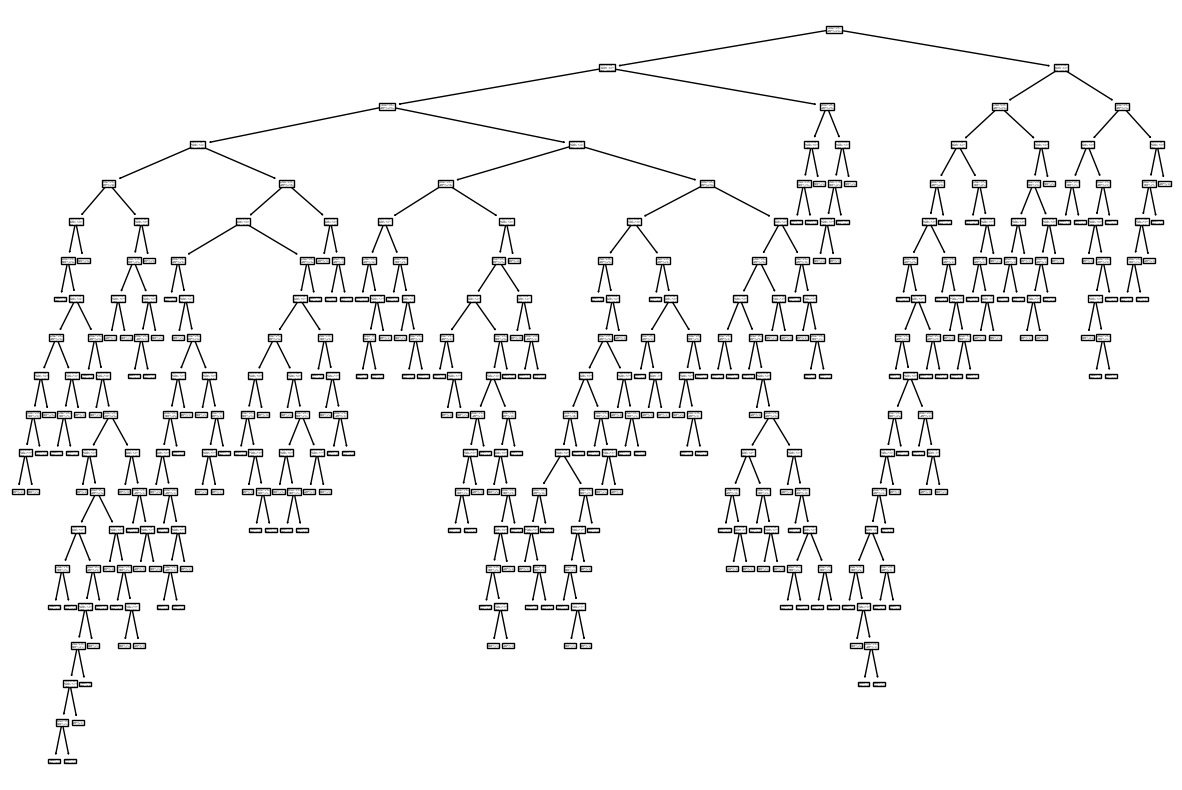

In [76]:
_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_tree);

In [77]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
y_predict = Dtree_tree.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
tree_acc = accuracy_score(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
print()
print('-'*50)
print('Accuracy : ', tree_acc)
print('-'*50)


--------------------------------------------------
Accuracy :  0.6656017039403621
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# grid_search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7 ],
    'max_leaf_nodes' : [7,9,11,13,15,17],
    'min_samples_split': [ 2, 5, 10],
    'min_samples_leaf': [ 1, 3, 5, 7],
    'max_features': [None, 'sqrt'],
    'criterion': ['gini', 'entropy']
    # ,    # 'random_state' : [1]
}

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print('-'*50)

# test decison tree
best_param = grid_search.best_params_
Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
                                         max_depth = best_param['max_depth'],
                                         max_features = best_param['max_features'],
                                         max_leaf_nodes = best_param['max_leaf_nodes'],
                                         min_samples_leaf = best_param['min_samples_leaf'],
                                         min_samples_split = best_param['min_samples_split']
                                        #  ,random_state = best_param['random_state']
                                         )

Dtree_grid_best.fit(X_train,y_train)

_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid_best);

y_grid_best_predict = Dtree_grid_best.predict(X_test)

acc = accuracy_score(y_test, y_grid_best_predict)

print('-'*50)
print('test accuracy : ', acc)
print('-'*50)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
best_param = grid_search.best_params_
best_param

In [ ]:
Dtree_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth= None, max_features = 'sqrt', max_leaf_nodes = 11, min_samples_leaf = 7, min_samples_split = 5)

In [ ]:
Dtree_grid.fit(X_train,y_train)

In [ ]:
_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid);

In [ ]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
y_grid_predict = Dtree_grid.predict(X_test)

In [ ]:
accuracy_score(y_test, y_grid_predict)